In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import rc
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


In [4]:
path = '../data/open/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')


train.drop(['ID'],axis=1, inplace=True)
test.drop(['ID'],axis=1, inplace=True)

train.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [5]:
test.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [6]:
def wrangling(train_set, test_set):
    
    print("---Shape---")
    display(train_set.shape)
    display(test_set.shape)
    
    print("---Info----")
    display(train_set.info())
    display(test_set.info())
    
    print("---NaN----")
    display(train_set.isna().sum())
    display(test_set.isna().sum())
    
    print("---Duplicated---")
    display(train_set[train_set.duplicated()])
    display(test_set[test_set.duplicated()])
    
    print("---Description---")
    display(train_set.describe())
    display(test_set.describe())
    
    print("---Unique---")
    display(train_set.nunique())
    display(test_set.nunique())
    
wrangling(train,test)

---Shape---


(39609, 22)

(10963, 7)

---Info----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   사고일시         39609 non-null  object
 1   요일           39609 non-null  object
 2   기상상태         39609 non-null  object
 3   시군구          39609 non-null  object
 4   도로형태         39609 non-null  object
 5   노면상태         39609 non-null  object
 6   사고유형         39609 non-null  object
 7   사고유형 - 세부분류  39609 non-null  object
 8   법규위반         39609 non-null  object
 9   가해운전자 차종     39609 non-null  object
 10  가해운전자 성별     39609 non-null  object
 11  가해운전자 연령     39609 non-null  object
 12  가해운전자 상해정도   39609 non-null  object
 13  피해운전자 차종     38618 non-null  object
 14  피해운전자 성별     38618 non-null  object
 15  피해운전자 연령     38618 non-null  object
 16  피해운전자 상해정도   38618 non-null  object
 17  사망자수         39609 non-null  int64 
 18  중상자수         39609 non-null  int64 
 19  경상자수         

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고일시    10963 non-null  object
 1   요일      10963 non-null  object
 2   기상상태    10963 non-null  object
 3   시군구     10963 non-null  object
 4   도로형태    10963 non-null  object
 5   노면상태    10963 non-null  object
 6   사고유형    10963 non-null  object
dtypes: object(7)
memory usage: 599.7+ KB


None

---NaN----


사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

사고일시    0
요일      0
기상상태    0
시군구     0
도로형태    0
노면상태    0
사고유형    0
dtype: int64

---Duplicated---


,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
3360,2019-04-05 11,금요일,맑음,대구광역시 수성구 매호동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,승용,...,상해없음,승용,여,37세,경상,0,0,1,0,3


,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
758,2022-01-27 13,목요일,맑음,대구광역시 동구 효목동,교차로 - 교차로안,건조,차대차
994,2022-02-07 07,월요일,맑음,대구광역시 서구 내당동,단일로 - 기타,건조,차대차
1185,2022-02-14 17,월요일,맑음,대구광역시 남구 봉덕동,단일로 - 기타,건조,차대차
1633,2022-03-03 08,목요일,맑음,대구광역시 서구 비산동,단일로 - 기타,건조,차대차
2527,2022-04-06 08,수요일,맑음,대구광역시 북구 태전동,교차로 - 교차로안,건조,차대차
3246,2022-04-29 08,금요일,비,대구광역시 달서구 상인동,단일로 - 기타,젖음/습기,차대차
3330,2022-05-01 18,일요일,맑음,대구광역시 달서구 송현동,단일로 - 기타,건조,차대차
3360,2022-05-02 20,월요일,비,대구광역시 달서구 상인동,교차로 - 교차로안,젖음/습기,차대차
3817,2022-05-15 15,일요일,맑음,대구광역시 수성구 만촌동,단일로 - 기타,건조,차대차
3888,2022-05-17 17,화요일,맑음,대구광역시 북구 노원동3가,단일로 - 기타,건조,차대차


---Description---


,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
count,10963,10963,10963,10963,10963,10963,10963
unique,5548,7,5,192,11,6,3
top,2022-11-10 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차
freq,10,1743,10321,422,5039,10394,8559


---Unique---


사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          89
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          97
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

사고일시    5548
요일         7
기상상태       5
시군구      192
도로형태      11
노면상태       6
사고유형       3
dtype: int64

In [7]:
import re
def extract_and_convert_to_int(data):
    numbers = re.findall(r'\d+', str(data))
    return int(numbers[0]) if numbers else np.nan

train['가해운전자 연령'] = train['가해운전자 연령'].apply(extract_and_convert_to_int)
train['피해운전자 연령'] = train['피해운전자 연령'].apply(extract_and_convert_to_int)

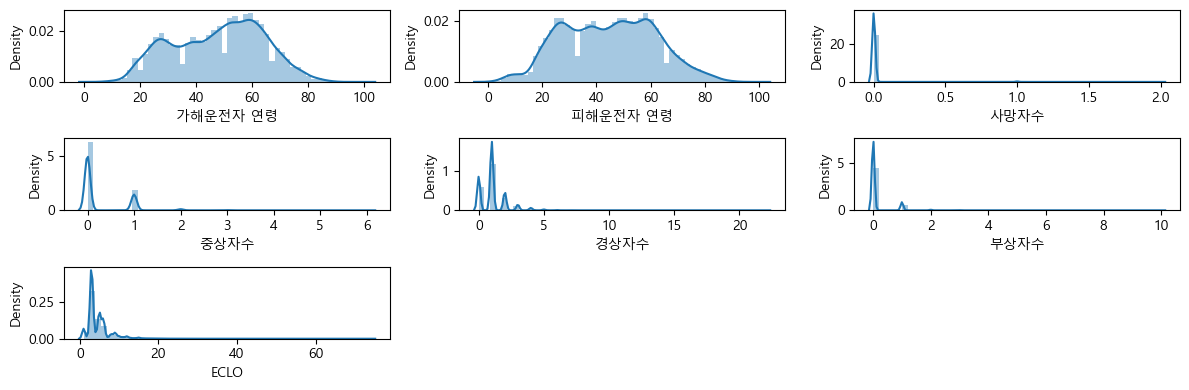

In [8]:
num_cols = train.select_dtypes(exclude='object').columns.tolist()
cat_cols = train.select_dtypes(include='object').columns.tolist()

i = 0 
plt.figure(figsize=(12,4))
for col in num_cols:
    i += 1
    plt.subplot(3,3,i)
    sns.distplot(train[col])
plt.tight_layout()

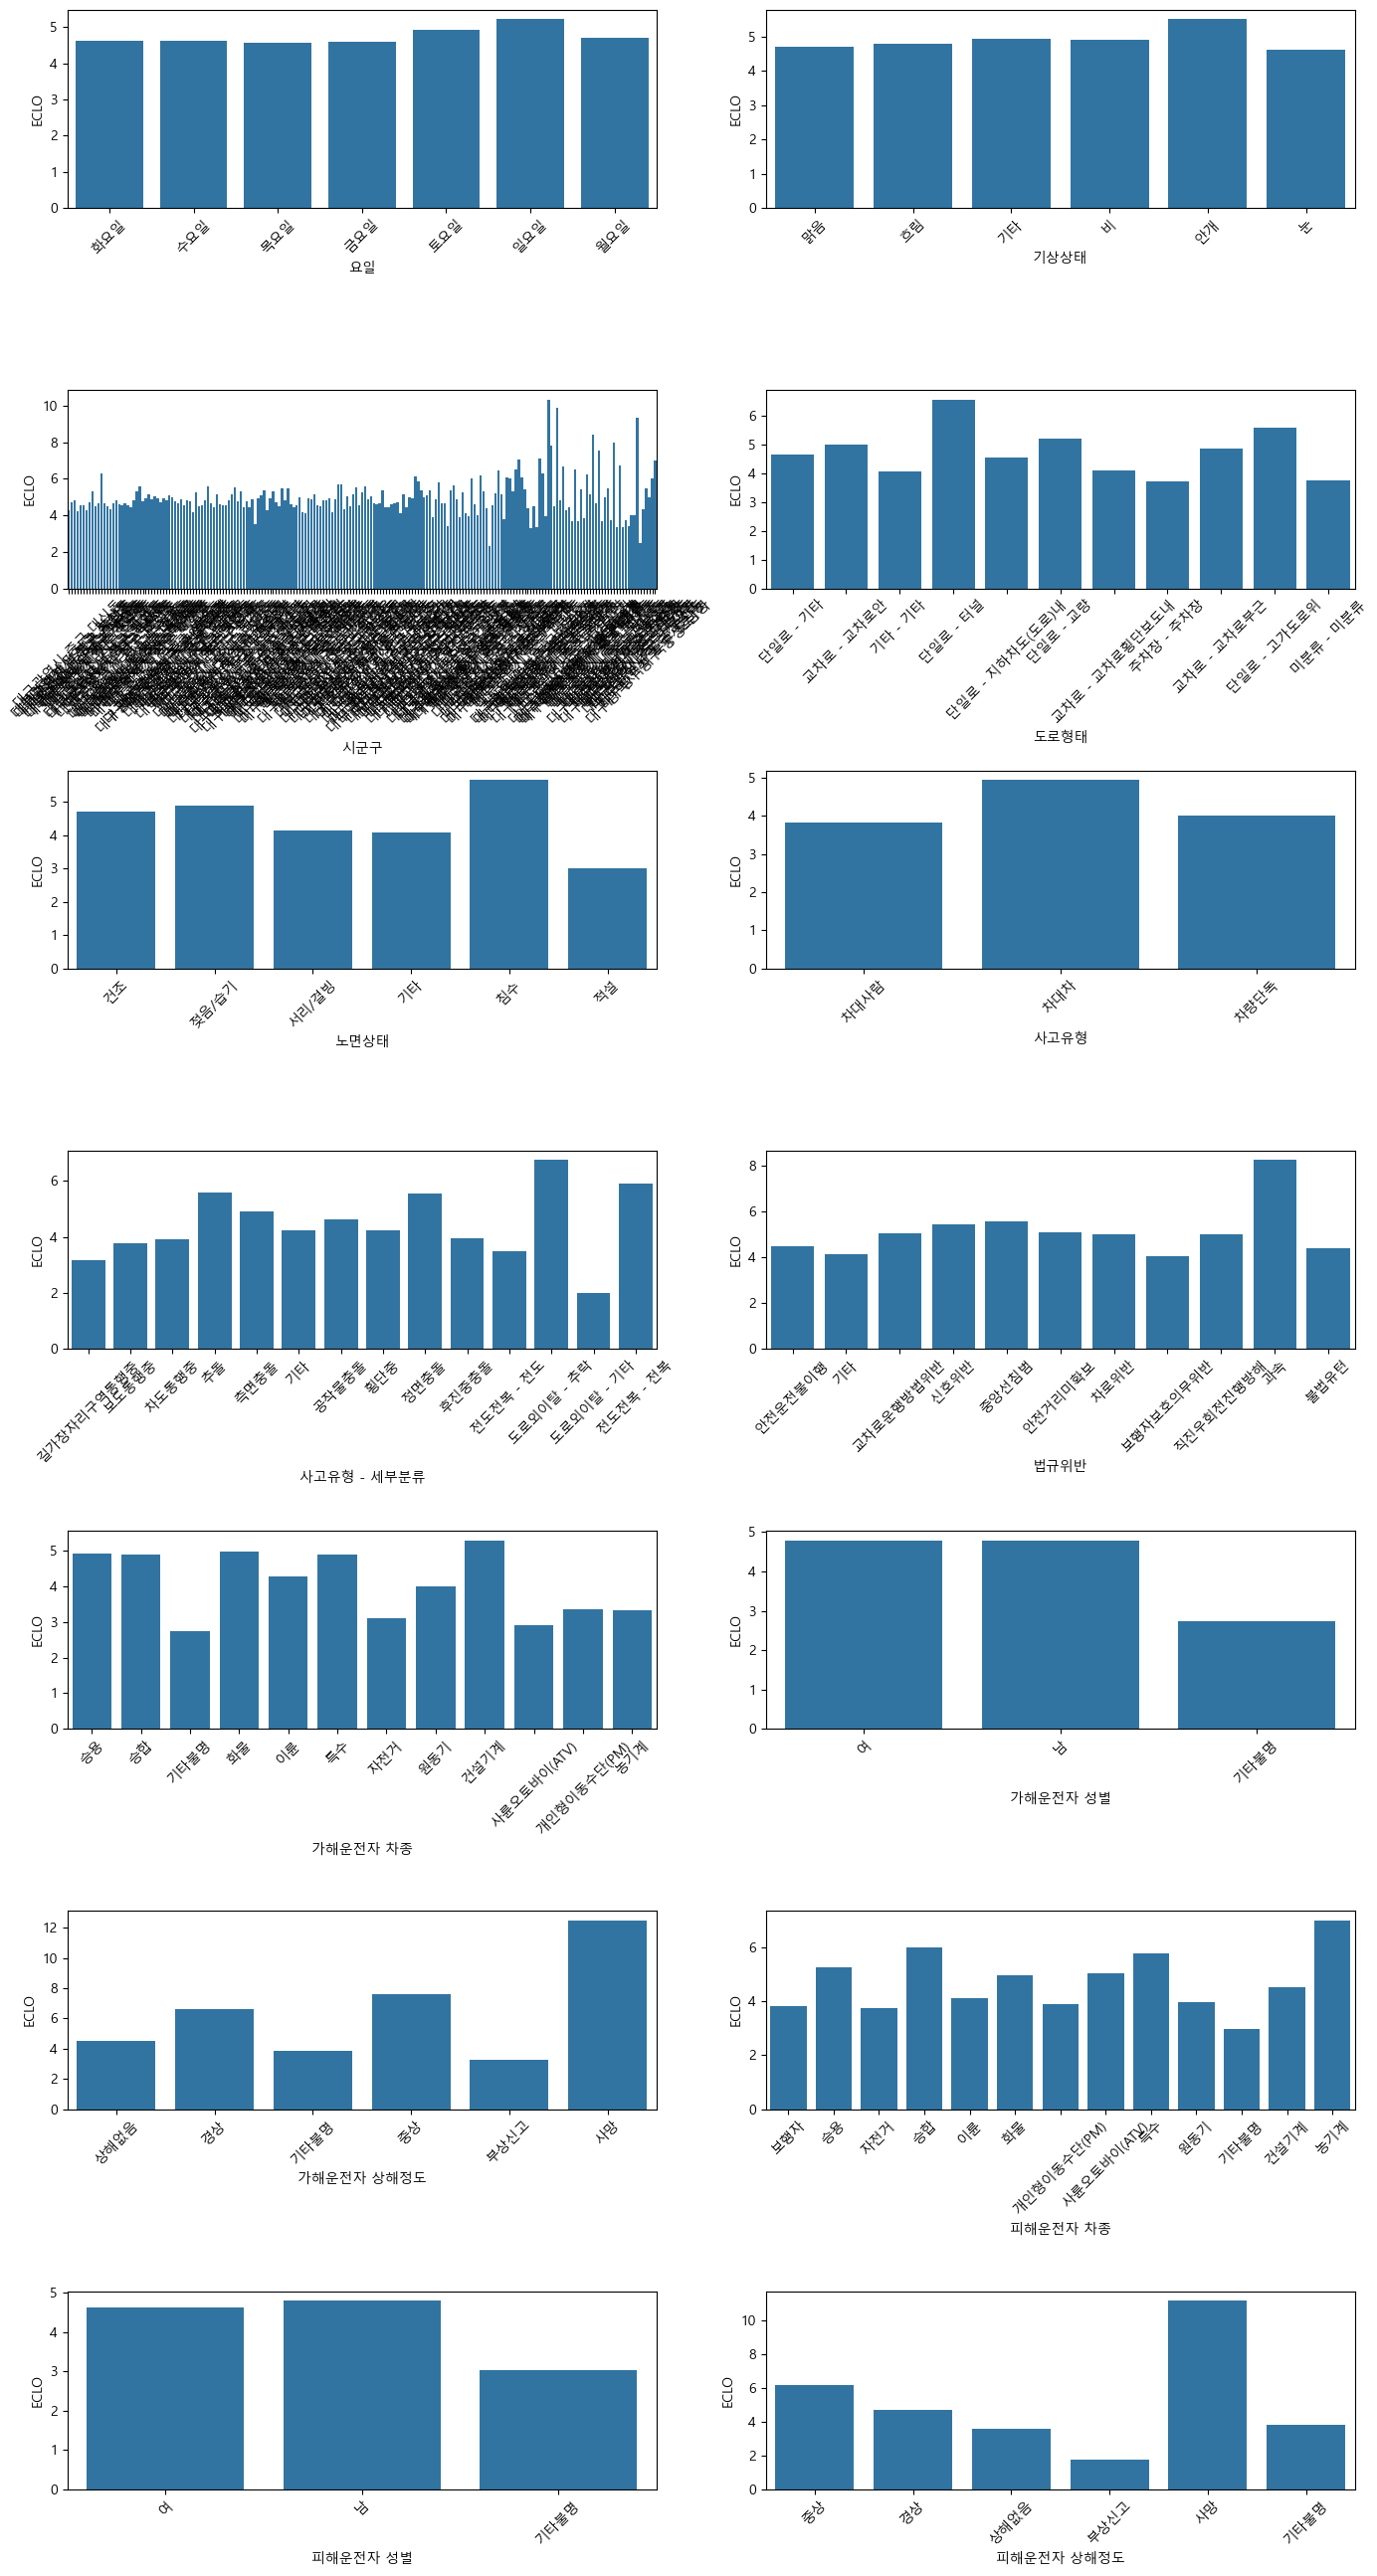

In [9]:
i = 0 
plt.figure(figsize=(14,26))
for col in ['요일',
 '기상상태',
 '시군구',
 '도로형태',
 '노면상태',
 '사고유형',
 '사고유형 - 세부분류',
 '법규위반',
 '가해운전자 차종',
 '가해운전자 성별',
 '가해운전자 상해정도',
 '피해운전자 차종',
 '피해운전자 성별',
 '피해운전자 상해정도']:
    i += 1
    plt.subplot(7,2,i)
    sns.barplot(x=train[col], y=train['ECLO'],ci=None)
    plt.xticks(rotation=45)
plt.tight_layout()


In [10]:
num_by_region = train.groupby(['시군구'])['ECLO'].mean().sort_values(ascending=False)
print("높은 ECLO")
display(num_by_region[:10])
print()
print("낮은 ECLO")
display(num_by_region[-10:])

높은 ECLO


시군구
대구광역시 북구 노곡동    10.333333
대구광역시 동구 덕곡동     9.875000
대구광역시 중구 대안동     9.333333
대구광역시 동구 내동      8.400000
대구광역시 중구 하서동     8.000000
대구광역시 동구 진인동     7.823529
대구광역시 동구 둔산동     7.571429
대구광역시 북구 조야동     7.120000
대구광역시 동구 송정동     7.071429
대구광역시 북구 도남동     7.000000
Name: ECLO, dtype: float64


낮은 ECLO


시군구
대구광역시 동구 매여동      3.666667
대구광역시 중구 삼덕동1가    3.511013
대구광역시 중구 향촌동      3.400000
대구광역시 중구 수창동      3.392857
대구광역시 중구 서성로2가    3.333333
대구광역시 중구 북성로1가    3.333333
대구광역시 중구 화전동      3.333333
대구광역시 동구 미대동      3.300000
대구광역시 중구 종로2가     2.500000
대구광역시 중구 동일동      2.333333
Name: ECLO, dtype: float64

In [11]:
train['구'] = train['시군구'].str.split(" ",expand=True)[1]
train['동'] = train['시군구'].str.split(" ",expand=True)[2]

In [12]:
display(train.groupby(['구'])['ECLO'].mean().nlargest(10))
display(train.groupby(['동'])['ECLO'].mean().nlargest(10))

구
달성군    5.072280
동구     4.889534
서구     4.775680
수성구    4.727300
북구     4.687669
남구     4.623681
달서구    4.618441
중구     4.541610
Name: ECLO, dtype: float64

동
노곡동    10.333333
덕곡동     9.875000
대안동     9.333333
내동      8.400000
하서동     8.000000
진인동     7.823529
둔산동     7.571429
조야동     7.120000
송정동     7.071429
도남동     7.000000
Name: ECLO, dtype: float64

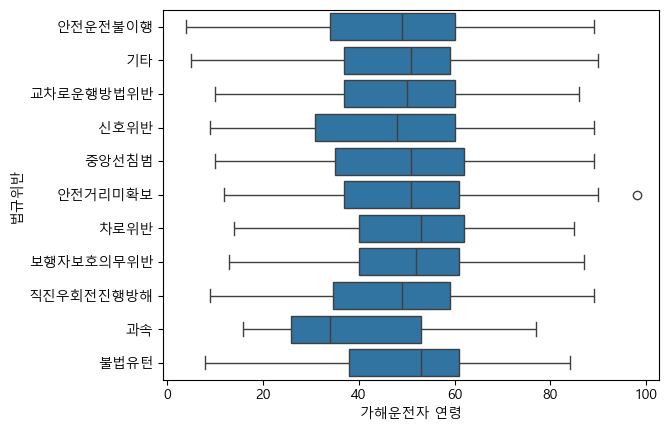

In [13]:
sns.boxplot(data=train, y='법규위반', x='가해운전자 연령')
plt.show()

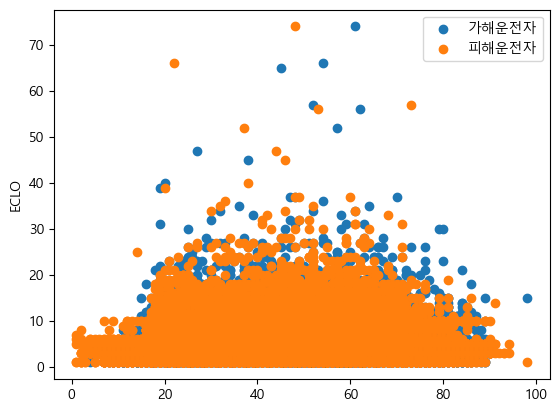

In [14]:
plt.scatter(x=train['가해운전자 연령'],y=train['ECLO'])
plt.ylabel("ECLO");

plt.scatter(x=train['피해운전자 연령'],y=train['ECLO'])
plt.ylabel("ECLO");
plt.legend(['가해운전자','피해운전자']);

In [15]:
train['년도'] = pd.to_datetime(train['사고일시']).dt.year
train['월'] = pd.to_datetime(train['사고일시']).dt.month
train['일'] = pd.to_datetime(train['사고일시']).dt.day
train['시간'] = pd.to_datetime(train['사고일시']).dt.hour

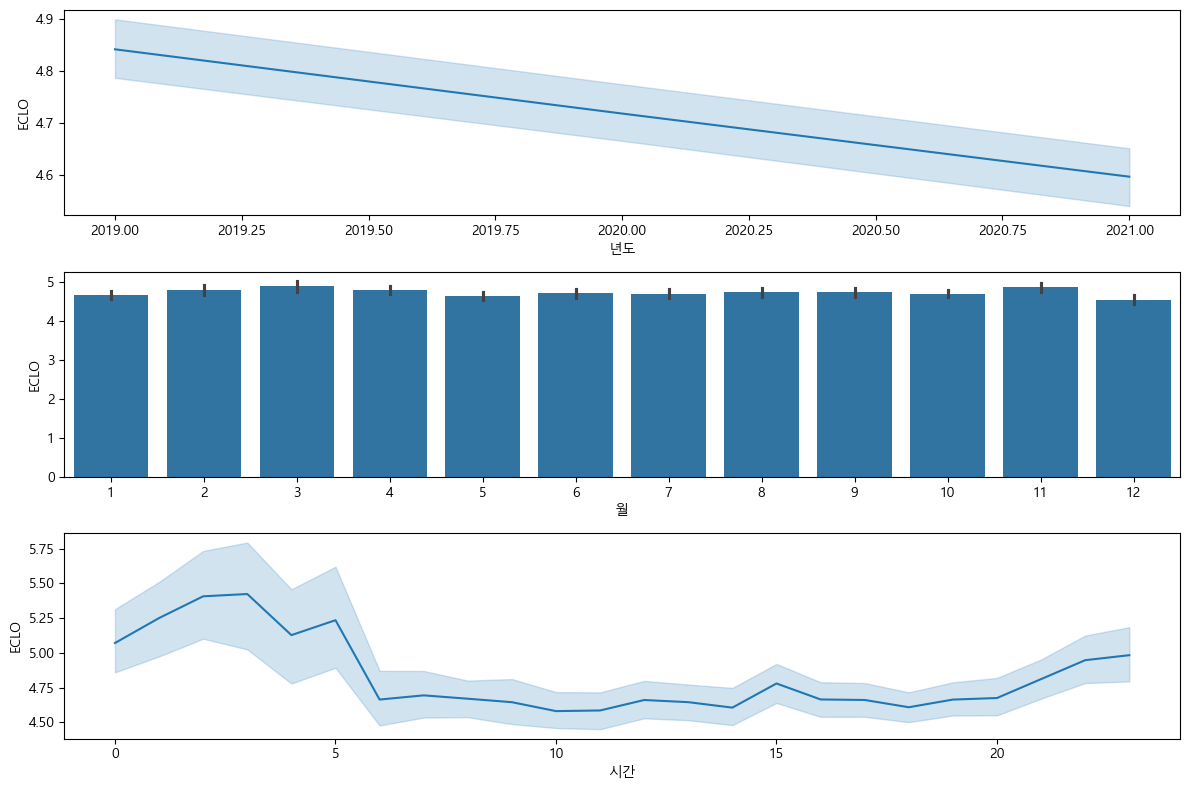

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
#가정 1. 년도가 증가할수록 교통사고는 낮을 것이다.
sns.lineplot(data=train, x='년도', y='ECLO')
plt.subplot(3,1,2)
#가정 2. 공휴일이 있는 월에 ECLO가 높을 것이다.
sns.barplot(data=train, x='월', y='ECLO')
plt.subplot(3,1,3)
#가정 3. 출퇴근 시간에 ECLO가 높을 것이다.
sns.lineplot(data=train, x='시간', y='ECLO')
plt.tight_layout();

In [17]:
train_df = train.copy()
test_df = test.copy()
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 

train_df[['연', '월', '일', '시간']] = train['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) 
train_df = train_df.drop(columns=['사고일시']) 

# 해당 과정을 test_x에 대해서도 반복해줍니다 
test_df[['연', '월', '일', '시간']] = test['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

In [18]:

light_df = pd.read_csv('../data/open/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])

light_df = light_df.groupby(['도시', '구', '동']).sum().reset_index()
light_df.reset_index(inplace=True, drop=True)

child_area_df = pd.read_csv('../data/open/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949').drop_duplicates()[['소재지지번주소']]
child_area_df['cnt'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])

child_area_df = child_area_df.groupby(['도시', '구', '동']).sum().reset_index()
child_area_df.reset_index(inplace=True, drop=True)

parking_df = pd.read_csv('../data/open/external_open/대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)

# countrywide = pd.read_csv('../data/open/external_open/countrywide_accident.csv')



In [19]:
display(train_df)

,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,...,구,동,년도,월,일,시간,연,도시,도로형태1,도로형태2
0,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51.0,상해없음,...,중구,대신동,2019,1,1,0,2019,대구광역시,단일로,기타
1,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39.0,상해없음,...,달서구,감삼동,2019,1,1,0,2019,대구광역시,단일로,기타
2,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70.0,상해없음,...,수성구,두산동,2019,1,1,1,2019,대구광역시,단일로,기타
3,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49.0,상해없음,...,북구,복현동,2019,1,1,2,2019,대구광역시,단일로,기타
4,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30.0,상해없음,...,동구,신암동,2019,1,1,4,2019,대구광역시,단일로,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52.0,상해없음,...,수성구,수성동3가,2021,12,31,19,2021,대구광역시,교차로,교차로안
39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60.0,상해없음,...,달서구,상인동,2021,12,31,19,2021,대구광역시,단일로,기타
39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60.0,중상,...,달서구,월성동,2021,12,31,21,2021,대구광역시,교차로,교차로안
39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40.0,상해없음,...,달서구,장동,2021,12,31,22,2021,대구광역시,기타,기타


In [20]:
display(test_df.head())

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안


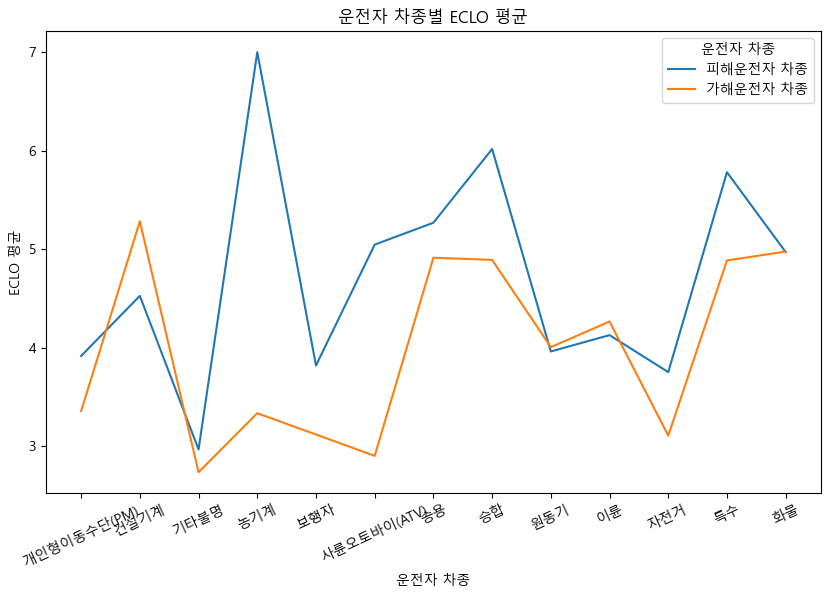

In [51]:

victim_car_kind_df = train_df.groupby('피해운전자 차종')[['ECLO']].mean().reset_index()
attacker_car_kind_df = train_df.groupby('가해운전자 차종')[['ECLO']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data = victim_car_kind_df, x = '피해운전자 차종', y = 'ECLO', label='피해운전자 차종')
sns.lineplot(data = attacker_car_kind_df, x = '가해운전자 차종', y = 'ECLO', label='가해운전자 차종')

plt.legend(title='운전자 차종')
plt.title('운전자 차종별 ECLO 평균')
plt.xlabel('운전자 차종')
plt.xticks(rotation=25)
plt.ylabel('ECLO 평균')
plt.show()


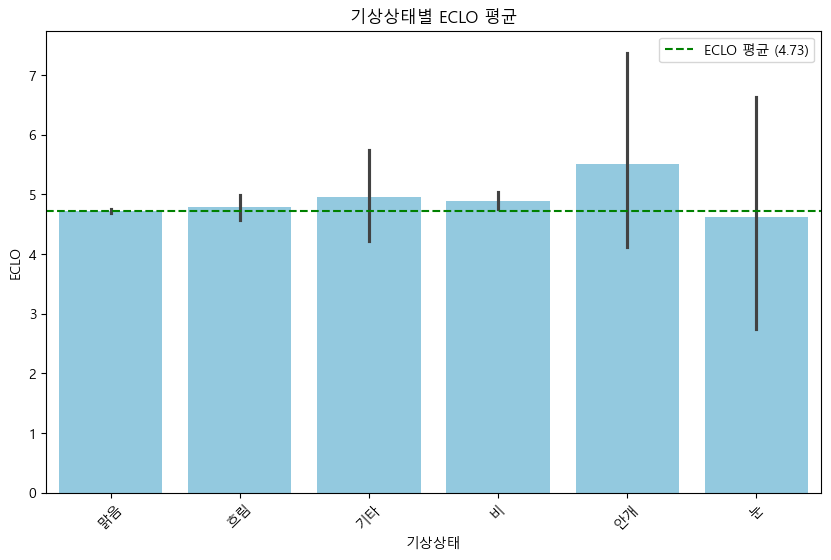

In [52]:
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='기상상태', y='ECLO', data=train_df, color='skyblue')
plt.xticks(rotation=45)
plt.title('기상상태별 ECLO 평균')
avg = train_df['ECLO'].mean()
ax1.axhline(avg, ls='--', label=f'ECLO 평균 ({round(avg, 2)})', color='g')
ax1.legend()

plt.show()

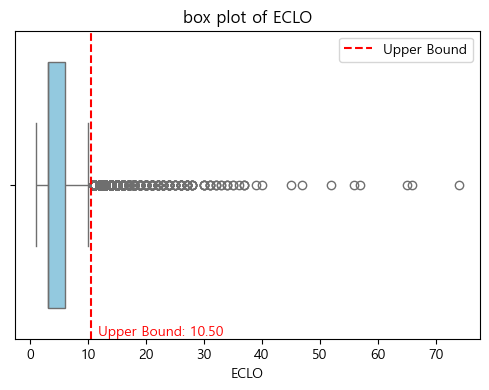

In [53]:
Q1 = train_df['ECLO'].quantile(0.25)
Q3 = train_df['ECLO'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5 * IQR


plt.figure(figsize=(6,4))
sns.boxplot(x='ECLO', data=train_df,color='skyblue')

plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

plt.text(upper_bound+12, 0.5, f'Upper Bound: {upper_bound:.2f}', color='r', ha='center', va='bottom')

plt.legend()

plt.title("box plot of ECLO")
plt.show()

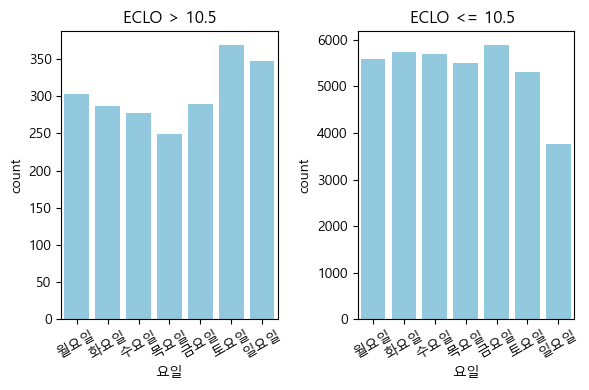

In [54]:
high_ECLO_df = train_df[train_df['ECLO'] > 10.5]
no_high_ECLO_df = train_df[train_df['ECLO'] <= 10.5]

x_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

fig, axes = plt.subplots(1, 2, figsize=(6,4))
sns.countplot(x='요일', data=high_ECLO_df,color='skyblue', order=x_order, ax=axes[0])
sns.countplot(x='요일', data=no_high_ECLO_df,color='skyblue', order=x_order, ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

In [60]:
test_x = test_df.copy()
train_x = train_df[test_x.columns].copy()
train_y = train_df['ECLO'].copy()

In [61]:
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)



for i in categorical_features:
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])


train_x.fillna(0, inplace=True)
test_x.fillna(0, inplace=True)

In [62]:
display(train_x, train_y, test_x)

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,4.627926,4.712888,4.712878,3.817650,2019,1,1,0,4.726704,4.541610,4.282449,4.671841,4.599599
1,4.627926,4.779150,4.712878,3.817650,2019,1,1,0,4.726704,4.618441,4.738938,4.671841,4.599599
2,4.627926,4.712888,4.712878,3.817650,2019,1,1,1,4.726704,4.727300,4.842715,4.671841,4.599599
3,4.627926,4.712888,4.712878,4.944597,2019,1,1,2,4.726704,4.687669,4.208920,4.671841,4.599599
4,4.627926,4.712888,4.712878,4.944597,2019,1,1,4,4.726704,4.889534,4.549091,4.671841,4.599599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,4.600906,4.712888,4.712878,4.944597,2021,12,31,19,4.726704,4.727300,4.913420,4.882281,5.006142
39605,4.600906,4.712888,4.712878,4.944597,2021,12,31,19,4.726704,4.618441,4.293963,4.671841,4.599599
39606,4.600906,4.712888,4.712878,4.944597,2021,12,31,21,4.726704,4.618441,4.648867,4.882281,5.006142
39607,4.600906,4.712888,4.712878,4.944597,2021,12,31,22,4.726704,4.618441,4.672002,4.065962,4.599599


0         5
1         3
2         3
3         5
4         3
         ..
39604     3
39605     3
39606    10
39607     3
39608     6
Name: ECLO, Length: 39609, dtype: int64

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,4.726704,4.727300,4.881657,4.882281,5.006142
1,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,4.726704,4.727300,4.563008,4.671841,4.599599
2,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.726704,4.727300,4.945578,4.882281,5.006142
3,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.726704,4.727300,4.438172,4.671841,4.599599
4,4.920811,4.712888,4.712878,4.944597,2022,1,1,6,4.726704,4.618441,4.738938,4.882281,5.006142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,4.920811,4.712888,4.712878,4.944597,2022,12,31,18,4.726704,4.623681,4.492281,4.671841,6.555670
10959,4.920811,4.712888,4.712878,4.944597,2022,12,31,18,4.726704,4.727300,4.928144,4.671841,4.599599
10960,4.920811,4.712888,4.712878,4.944597,2022,12,31,20,4.726704,4.727300,5.355036,4.671841,4.599599
10961,4.920811,4.712888,4.712878,4.944597,2022,12,31,20,4.726704,4.727300,5.079498,4.882281,4.863035
